In [2]:
import numpy as np


def generate_cities(number_cities: int) -> list:
    """
    This function generates a list of cities with random coordinates in 3D space.

    Parameters:
    - number_cities (int): Number of cities to generate.

    Returns:
    - list: A list of cities with random coordinates.
    """

    cities = []
    for _ in range(number_cities):
        # Generate random coordinates in 3D space
        x, y, z = np.random.rand(3)
        cities.append(np.array([x, y, z]))  # Convertir las coordenadas a un arreglo de NumPy
    return cities


def calculate_distance(point_1: np.array, point_2: np.array) -> float:
    """
    This function calculates the Euclidean distance between two points.

    Parameters:
    - point_1 (np.array): First point.
    - point_2 (np.array): Second point.

    Returns:
    - float: The Euclidean distance between the two points.
    """
    # HERE return distance between two points using euclidean distance formula
    distance = np.linalg.norm(point_1 - point_2)  # Calcular la distancia euclidiana
    return distance

Ant Colony Optimization

In [3]:
def ant_colony_optimization(cities, n_ants, n_iterations, alpha, beta, evaporation_rate, Q):
    """
    This function solves the Traveling Salesman Problem using Ant Colony Optimization.

    Parameters:
    - cities (list): List of cities.
    - n_ants (int): Number of ants.
    - n_iterations (int): Number of iterations.
    - alpha (float): It determines how much the ants are influenced by the pheromone trails left by other ants.
    - beta (float):  It determines how much the ants are influenced by the distance to the next city
    - evaporation_rate (float): Evaporation rate.
    - Q (float): It determines the intensity of the pheromone trail left behind by an ant.
    """
    number_cities = len(cities)  # Get number of points
    pheromone = np.ones((number_cities, number_cities))  # Initialize pheromone matrix with ones
    
    # initialize output metrics
    best_path = None
    best_path_length = np.inf

    # per each iteration the ants will build a path
    for iteration in range(n_iterations):
        paths = []  # store the paths of each ant
        path_lengths = []

        for ant in range(n_ants):
            visited = [False] * number_cities

            # you could start from any city, but let's start from a random one
            current_city = np.random.randint(number_cities)
            visited[current_city] = True
            path = [current_city]  # Store only the index of the current city
            path_length = 0

            while False in visited:  # while there are unvisited cities
                unvisited = np.where(np.logical_not(visited))[0]
                probabilities = np.zeros(len(unvisited))

                # based on pheromone, distance and alpha and beta parameters, define the preference
                # for an ant to move to a city
                for i, unvisited_city in enumerate(unvisited):
                    # calculate the probability of moving to a city based on pheromone, distance and alpha and beta parameters
                    pheromone_factor = pheromone[current_city, unvisited_city] ** alpha
                    visibility_factor = 1 / calculate_distance(cities[current_city], cities[unvisited_city]) ** beta
                    probabilities[i] = pheromone_factor * visibility_factor

                # normalize probabilities
                probabilities /= np.sum(probabilities)

                next_city = np.random.choice(unvisited, p=probabilities)
                path.append(next_city)  # Store only the index of the next city
                # increase the cost of move through the path
                path_length += calculate_distance(cities[current_city], cities[next_city])
                visited[next_city] = True
                # move to the next city, for the next iteration
                current_city = next_city

            paths.append(path)
            path_lengths.append(path_length)

            # update with current best path, this is a minimization problem
            if path_length < best_path_length:
                best_path = path  # Store only the indices of the best path
                best_path_length = path_length

        # remove a bit of pheromone of all map, it's a way to avoid local minima
        pheromone *= evaporation_rate

        # current ant must add pheromone to the path it has walked
        for path, path_length in zip(paths, path_lengths):
            for i in range(number_cities - 1):
                pheromone[path[i], path[i + 1]] += Q / path_length
            pheromone[path[-1], path[0]] += Q / path_length
                
    return best_path, best_path_length

In [29]:
import numpy as np

# Definir parámetros del modelo
number_cities = 50  # Podrías elegir entre [10, 20, 30, 40, 50]
number_ants = 200
number_iterations = 100
alpha = 1
beta = 0.1
evaporation_rate = 0.5
Q = 1

# Crear lista de ciudades
cities = generate_cities(number_cities)

# Llamar a la función ant_colony_optimization
best_path, best_path_length = ant_colony_optimization(cities, number_ants, number_iterations, alpha, beta, evaporation_rate, Q)

Best path: [15, 8, 23, 45, 44, 13, 46, 39, 28, 40, 11, 36, 26, 38, 4, 9, 31, 5, 0, 24, 49, 29, 17, 41, 1, 19, 33, 48, 34, 2, 25, 3, 20, 7, 35, 42, 18, 47, 27, 10, 14, 12, 37, 30, 43, 6, 22, 21, 16, 32]
Best path length: 20.577416837999316


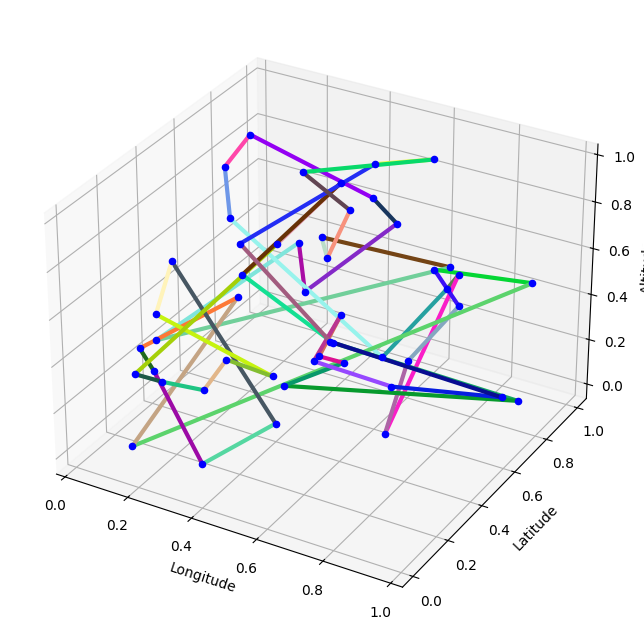

In [30]:
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def random_color() -> list:
    """
    This function generates a random color in RGB porcentage intensity.

    Returns:
    - list: A list with three random values between 0 and 1.
    """
    return [random.random(), random.random(), random.random()]


def plot_aco_route(cities: list, best_path: list):
    """
    This function plots the cities and the best path found by the ACO algorithm.

    Parameters:
    - cities (list): A list of cities with their coordinates.
    - best_path (list): The best path found by the ACO algorithm.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")

    # Plot the lines between cities in the best path
    for i in range(len(best_path) - 1):
        ax.plot(
            [cities[best_path[i]][0], cities[best_path[i + 1]][0]],  # x axis
            [cities[best_path[i]][1], cities[best_path[i + 1]][1]],  # y axis
            [cities[best_path[i]][2], cities[best_path[i + 1]][2]],  # z axis
            c=random_color(),
            linestyle="-",
            linewidth=3,
        )

    # Connect the first and last cities in the best path
    ax.plot(
        [cities[best_path[0]][0], cities[best_path[-1]][0]],
        [cities[best_path[0]][1], cities[best_path[-1]][1]],
        [cities[best_path[0]][2], cities[best_path[-1]][2]],
        c=random_color(),
        linestyle="-",
        linewidth=3,
    )

    # Plot all cities as filled circles
    for city in cities:
        ax.scatter(city[0], city[1], city[2], c="b", marker="o")

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_zlabel("Altitude")
    plt.show()
print("Best path:", best_path)
print("Best path length:", best_path_length)
plot_aco_route(cities, best_path)